Implantez les méthodes numériques d'intégration :

Méthode des rectangles médians
Méthode des trapèzes
Méthode de Simpson

Vous testerez ces méthodes sur quelques problèmes de calcul d'intégrale et comparerez vos résultats avec le résultat théorique et regarderez l'influence du nombre de subdivisions de l'intervalle d'intégration.

∫π20sin(x)dx

∫π20cos(x)dx

∫21log(x)dx

∫10exdx

∫1−1x3+1dx  

Comme toujours, remettez un notebook python ou une archive contenant code et commentaires textuels.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [63]:
def Integrate(f, t, n, methode):
    if methode not in {"rectangles_medians", "trapèze", "simpson"}:
        raise Exception("La méthode n'existe pas")
    a,b = t
    h = (b-a)/n

    if methode == "rectangles_medians":
        I_r = 0
        for i in range(n):
            x_mid = a + (i + 0.5) * h
            I_r += f(x_mid)
        return I_r * h
    elif methode == "trapeze":
        I_t = 0.5 * (f(a) + f(b))
        for i in range(1, n):
            x_i = a + i * h
            I_t += f(x_i)
        return I_t * h
    else:
        if n % 2 == 1:
            raise ValueError("n ne doit pas être un impair.")
        h = (b - a) / n
        I_s = f(a) + f(b)
        for i in range(1, n, 2):
            x_i = a + i * h
            I_s += 4 * f(x_i)
        for i in range(2, n-1, 2):
            x_i = a + i * h
            I_s += 2 * f(x_i)
        return I_s * h / 3

In [77]:
def represente(f, t, n, methode):
    a, b = t
    x = np.linspace(a, b, 1000)
    y = f(x)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, 'b', linewidth=2)

    if methode == "rectangles_medians":
        x_rect = np.linspace(a + (b - a) / (2 * n), b - (b - a) / (2 * n), n)
        y_rect = f(x_rect)
        ax.bar(x_rect, y_rect, width=(b - a) / n, alpha=0.5, color='cyan', edgecolor='black')
        ax.set_title("Représentation de la Méthode des Rectangles Médians")
    elif methode == "trapeze":
        x_trap = np.linspace(a, b, n + 1)
        y_trap = f(x_trap)
        for i in range(n):
            ax.fill_between(x_trap[i:i+2], y_trap[i:i+2], alpha=0.5, color='orange', edgecolor='black')
        ax.set_title("Représentation de la Méthode des Trapèzes")
    elif methode == "simpson":
        x_simp = np.linspace(a, b, n + 1)
        y_simp = f(x_simp)
        for i in range(n):
            xi = np.linspace(x_simp[i], x_simp[i + 1], 100)
            yi = f(xi)
            ax.plot(xi, yi, 'k-', alpha=0.5)
        ax.set_title("Représentation de la Méthode de Simpson")

    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    plt.show()

## Integration et répresentation du sinus

In [65]:
I_sin, error = quad(np.sin, 0, np.pi/2)
print(f'Le résultat du calcul de l\'integrale:\n I_sin = {I_sin}\n')
print(f'I_r = ', Integrate(lambda x: np.sin(x), (0, np.pi/2), 4, "rectangles_medians"))
print(f'I_t = ', Integrate(lambda x: np.sin(x), (0, np.pi/2), 4, "trapèze"))
print(f'I_s = ', Integrate(lambda x: np.sin(x), (0, np.pi/2), 4, "simpson"))

Le résultat du calcul de l'integrale:
 I_sin = 0.9999999999999999

I_r =  1.0064545427995637
I_t =  1.0001345849741938
I_s =  1.0001345849741938


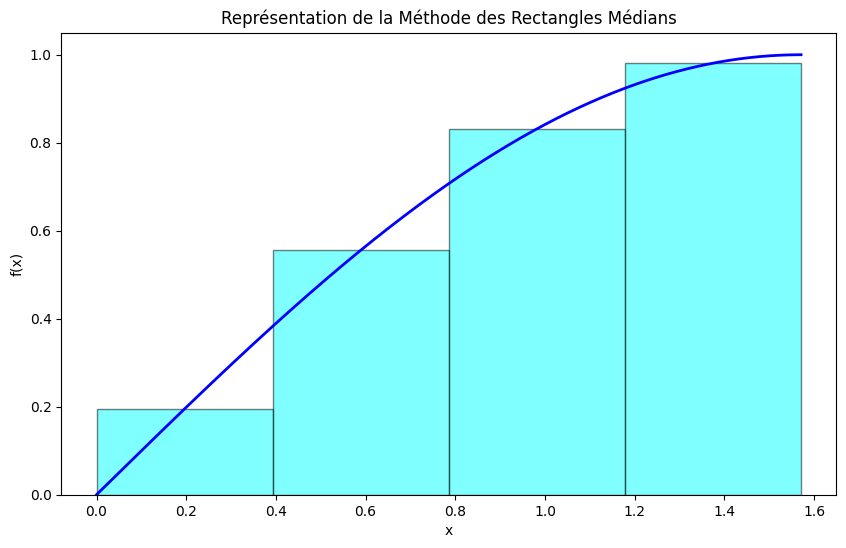

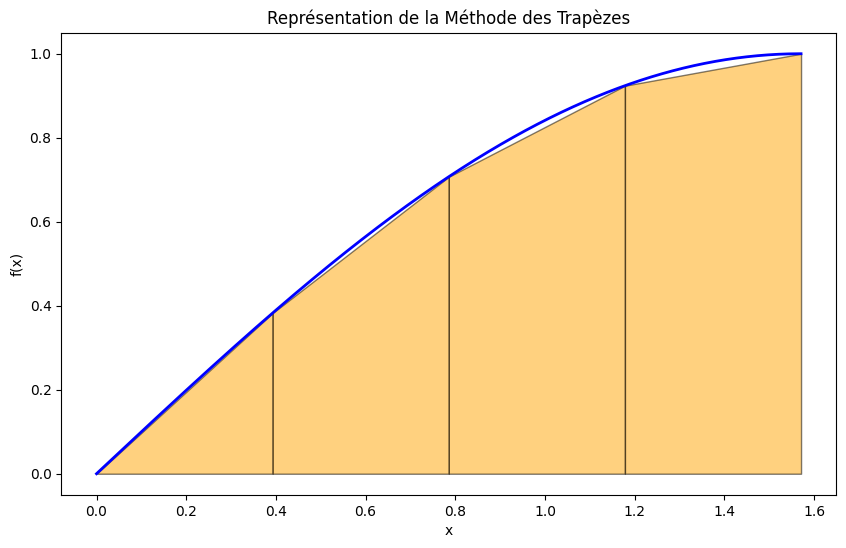

In [76]:
represente(np.sin, (0, np.pi/2), 4, "rectangles_medians")
represente(np.sin, (0, np.pi/2), 4, "trapeze")
represente(np.sin, (0, np.pi/2), 4, "simpson")

## Integration et répresentation du cosinus

In [67]:
I_cos, error = quad(np.cos, 0, np.pi/2)
print(f'Le résultat du calcul de l\'integrale:\n I_cos = {I_cos}\n')
print(f'I_r = ', Integrate(lambda x: np.cos(x), (0, np.pi/2), 4, "rectangles_medians"))
print(f'I_t = ', Integrate(lambda x: np.cos(x), (0, np.pi/2), 4, "trapèze"))
print(f'I_s = ', Integrate(lambda x: np.cos(x), (0, np.pi/2), 4, "simpson"))

Le résultat du calcul de l'integrale:
 I_cos = 0.9999999999999999

I_r =  1.006454542799564
I_t =  1.0001345849741938
I_s =  1.0001345849741938


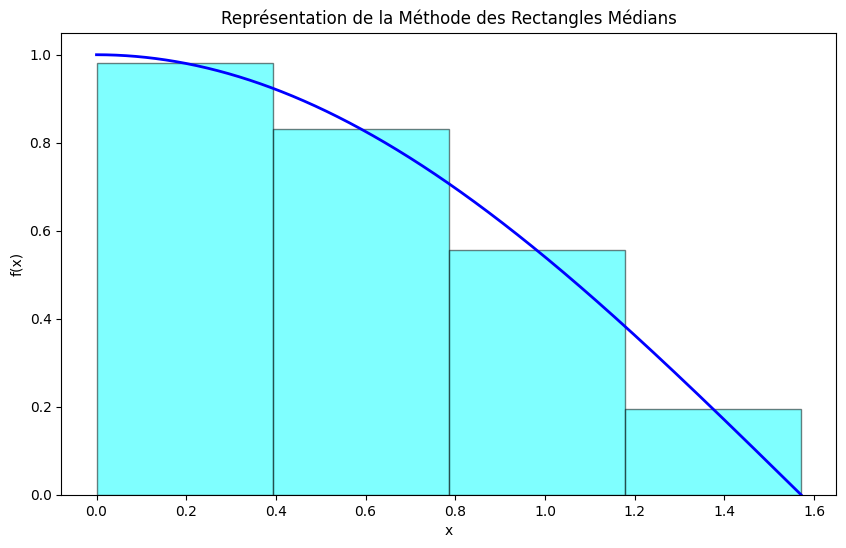

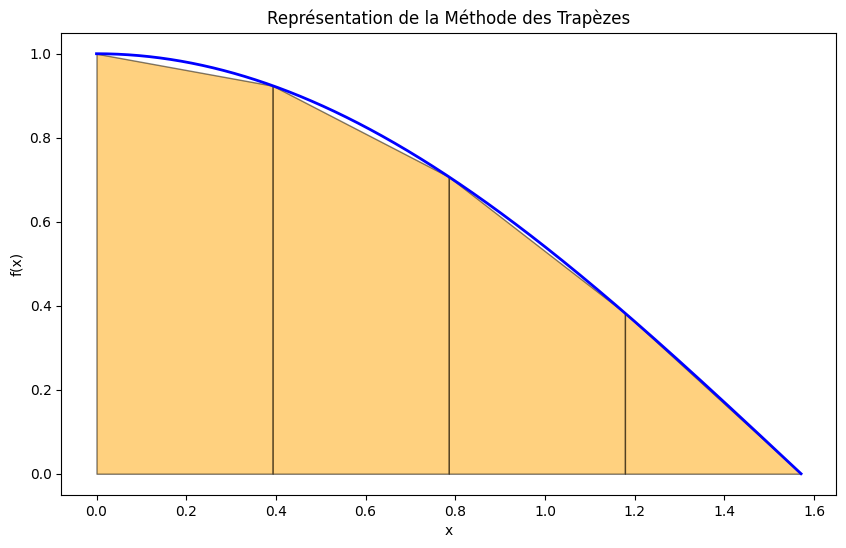

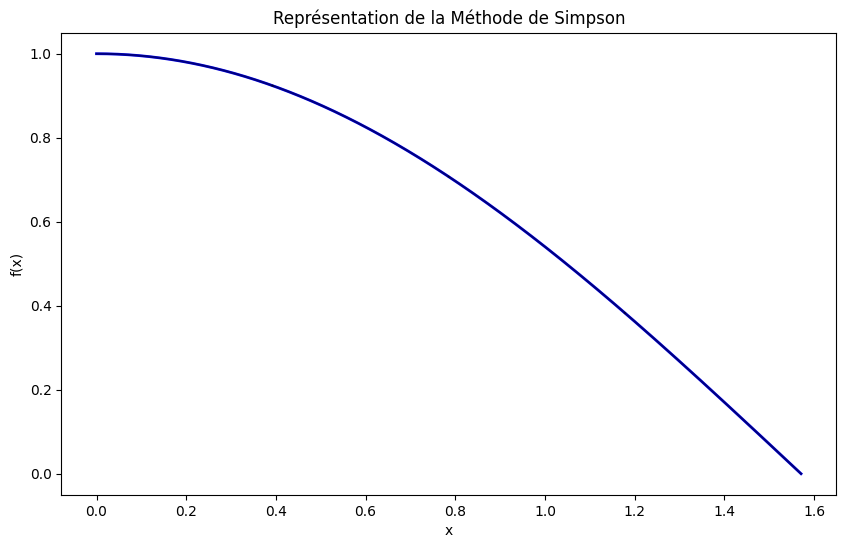

In [68]:
represente(np.cos, (0, np.pi/2), 4, "rectangles_medians")
represente(np.cos, (0, np.pi/2), 4, "trapeze")
represente(np.cos, (0, np.pi/2), 4, "simpson")

## Integration et répresentation du logarithme

In [69]:
I_log, error = quad(np.log, 1, 2)
print(f'Le résultat du calcul de l\'integrale:\n I_log = {I_log}\n')
print(f'I_r = ', Integrate(lambda x: np.log(x), (1, 2), 4, "rectangles_medians"))
print(f'I_t = ', Integrate(lambda x: np.log(x), (1, 2), 4, "trapèze"))
print(f'I_s = ', Integrate(lambda x: np.log(x), (1, 2), 4, "simpson"))

Le résultat du calcul de l'integrale:
 I_log = 0.38629436111989063

I_r =  0.38758831049474823
I_t =  0.386259562814567
I_s =  0.386259562814567


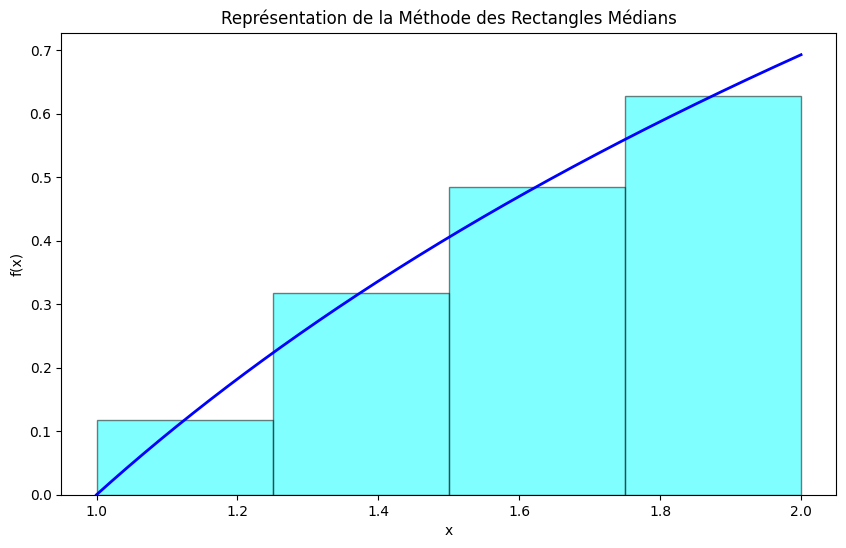

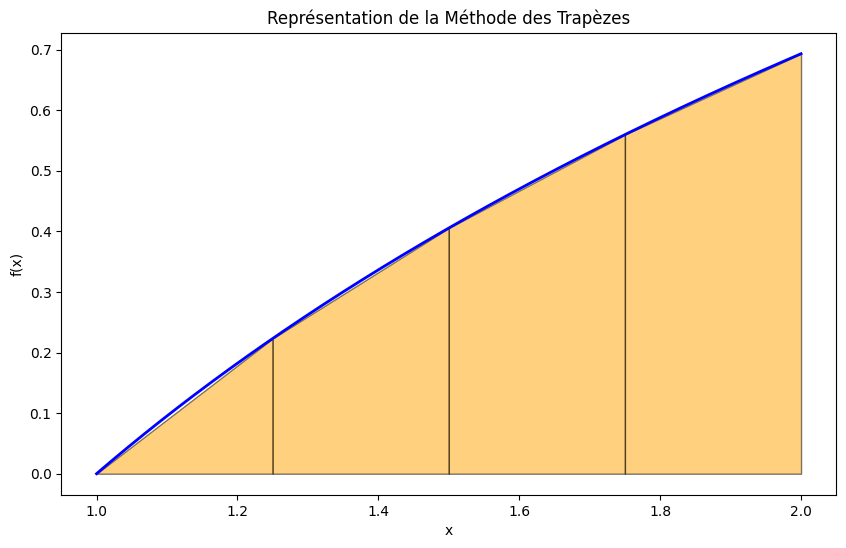

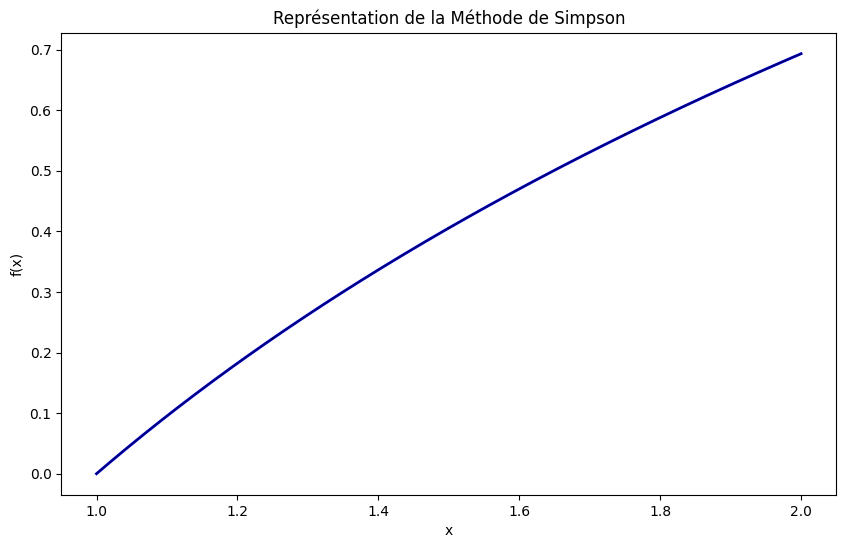

In [70]:
represente(np.log, (1, 2), 4, "rectangles_medians")
represente(np.log, (1, 2), 4, "trapeze")
represente(np.log, (1, 2), 4, "simpson")

## Integration et répresentation de l'exponentielle

In [71]:
I_exp, error = quad(np.exp, 0, 1)
print(f'Le résultat du calcul de l\'integrale:\n I_exp = {I_exp}\n')
print(f'I_r = ', Integrate(lambda x: np.exp(x), (0, 1), 4, "rectangles_medians"))
print(f'I_t = ', Integrate(lambda x: np.exp(x), (0, 1), 4, "trapèze"))
print(f'I_s = ', Integrate(lambda x: np.exp(x), (0, 1), 4, "simpson"))

Le résultat du calcul de l'integrale:
 I_exp = 1.7182818284590453

I_r =  1.713815279771087
I_t =  1.7183188419217472
I_s =  1.7183188419217472


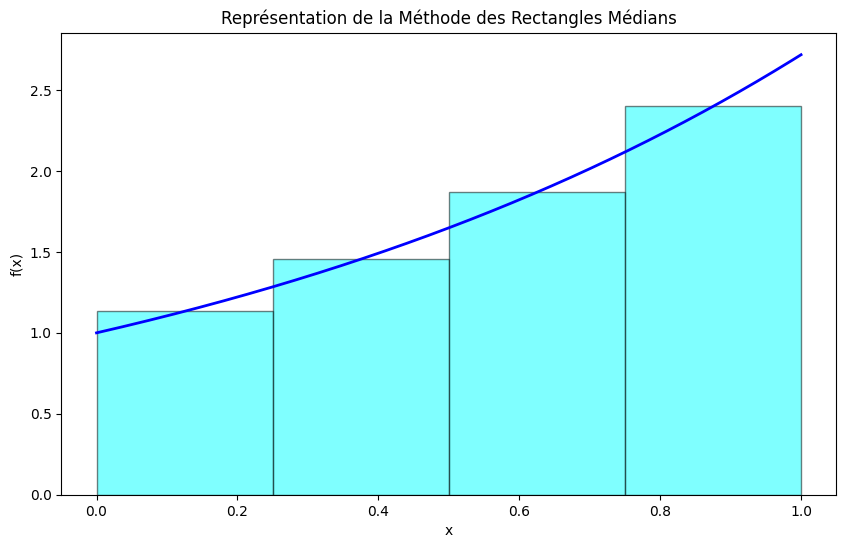

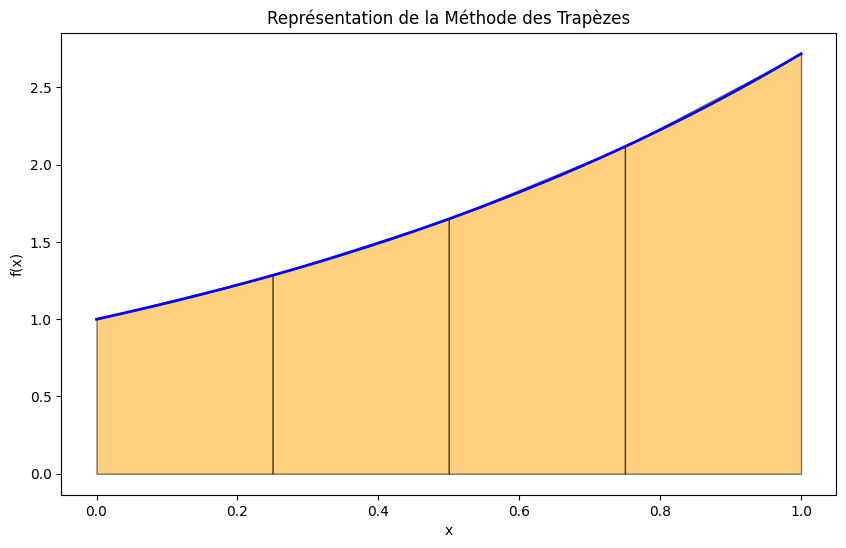

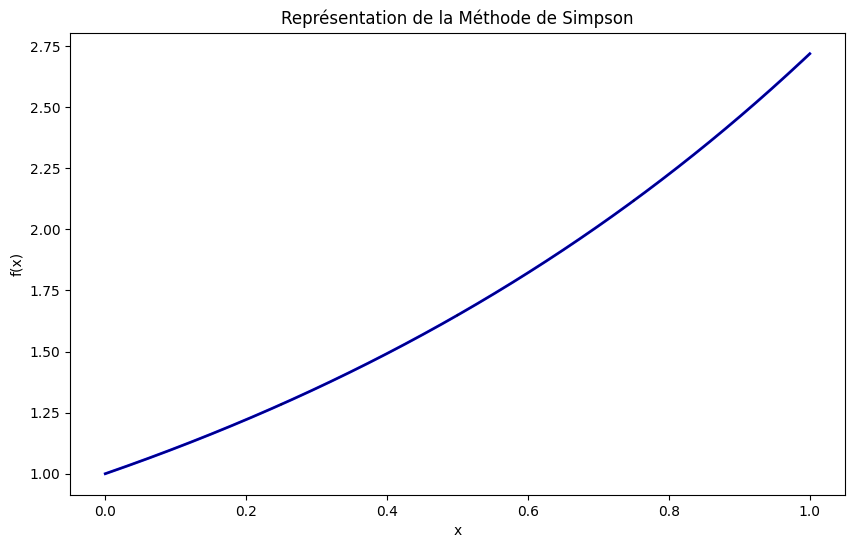

In [72]:
represente(np.exp, (0, 1), 4, "rectangles_medians")
represente(np.exp, (0, 1), 4, "trapeze")
represente(np.exp, (0, 1), 4, "simpson")

## Integration et representation du polynôme

In [73]:
I_poly, error = quad(lambda x : x**3 + 1, 0, np.pi/2)
print(f'Le résultat du calcul de l\'integrale:\n I_poly = {I_poly}\n')
print(f'I_r = ', Integrate(lambda x: x**3 + 1, (-1, 1), 4, "rectangles_medians"))
print(f'I_t = ', Integrate(lambda x: x**3 + 1, (-1, 1), 4, "trapèze"))
print(f'I_s = ', Integrate(lambda x: x**3 + 1, (-1, 1), 4, "simpson"))

Le résultat du calcul de l'integrale:
 I_poly = 3.0928133742011847

I_r =  2.0
I_t =  2.0
I_s =  2.0


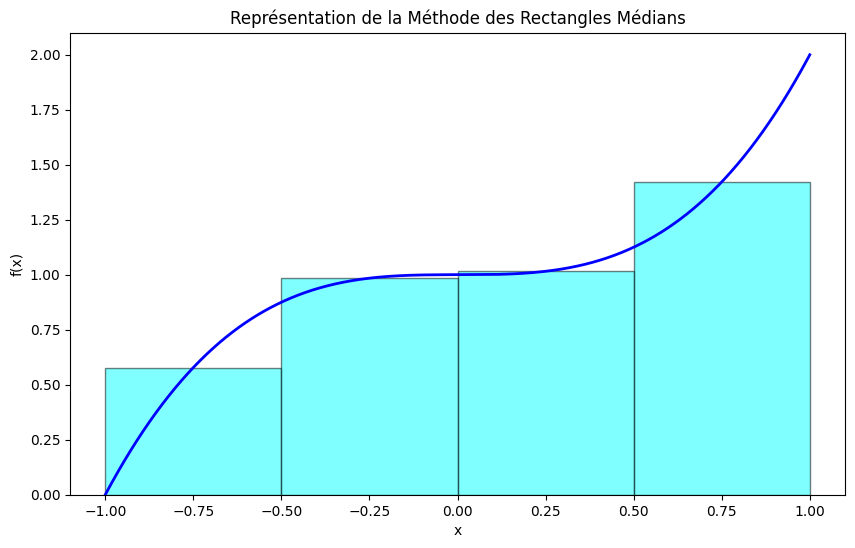

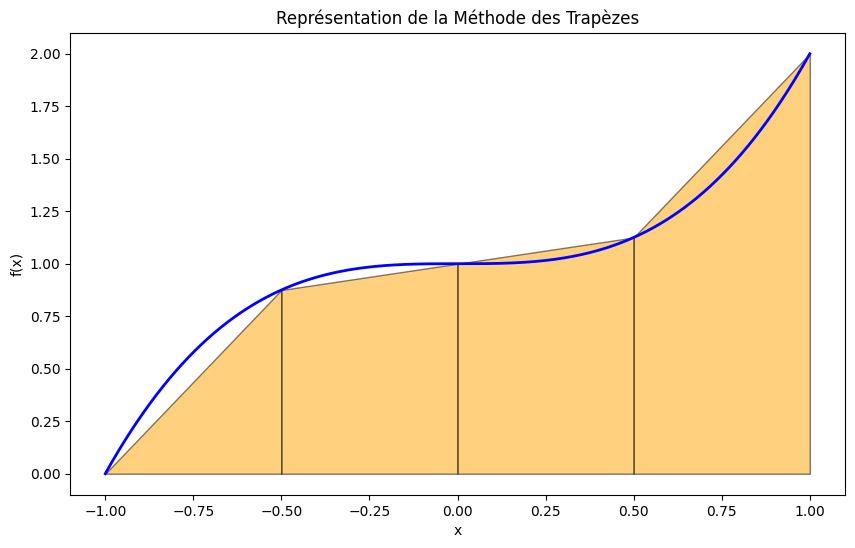

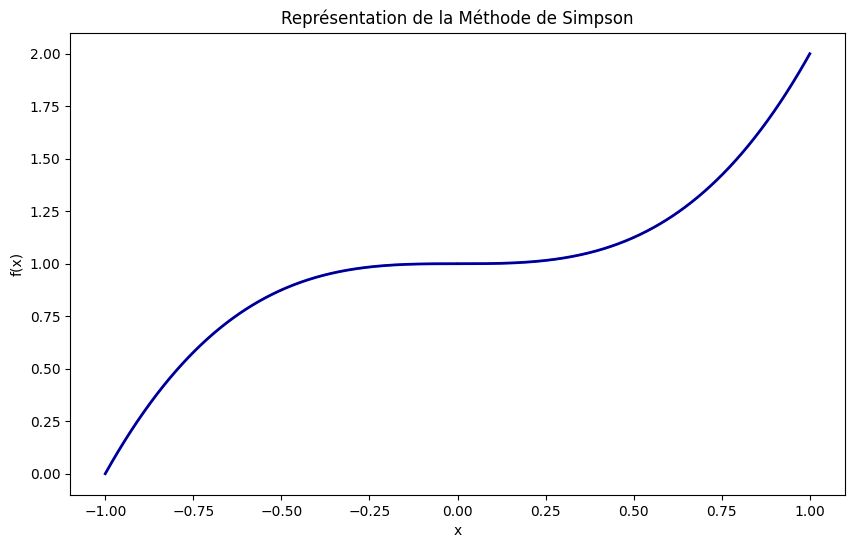

In [74]:
represente(lambda x: x**3 + 1, (-1, 1), 4, "rectangles_medians")
represente(lambda x: x**3 + 1, (-1, 1), 4, "trapeze")
represente(lambda x: x**3 + 1, (-1, 1), 4, "simpson")

## Commentaires

La methode de simpson donne des valeurs plus ou moins exactes pour les fonctions etudiées independanment de n car elle est basé sur l'approximation de la fonction par des polynomes du second degre sur chaque intervalle.
La methode trapeze egalement est meilleure que la methode rectangles medians , ses resultats sont égaux aux resultatx fournis par simpson dans nos exemples utilisés. 